# Audio Processing for Noise Removal
This notebook documents the processing steps for removing noise from an audio track.  In particular, it was being applied to a specific audio track from YouTube lectures by Paul Dirac.  These lectures had audio with substantial background "hum" which I wished to remove and produce a cleaned-up audio track.  (This first lecture is:  https://www.youtube.com/watch?v=vwYs8tTLZ24 )

As a preprocessing step, used a site called https://peggo.tv/ to convert part of the YouTube to an MP3 extract.  Then I used an MP3 to WAV conversion tool called ffmpeg (https://www.ffmpeg.org/).

## Loading Data

In [1]:
import numpy as np
import scipy.signal as sig
import io
import soundfile as sf
import matplotlib.pyplot as plt
import pickle
import sounddevice as sd

inputFile = './wav/Dirac_1_of_4.wav'
data, samplerate = sf.read(inputFile)
print('Samplerate = ', samplerate)

Samplerate =  44100


## Displaying Data

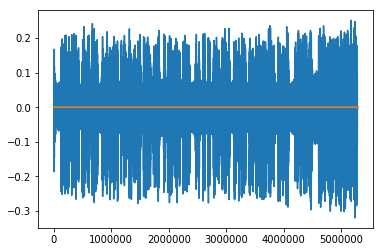

In [2]:
plt.plot(data)

In [3]:
len(data)/samplerate

120.0065306122449

The above snippet represents about 120 seconds (2 minutes) of data at the beginning of the lecture.  The entire lecture is about 1 hour long.

In [6]:
sd.play(data, samplerate)
#sd.stop()

0.0